## Customer Churn Prediction Model

Using the [Telco customer churn data](https://www.kaggle.com/code/mechatronixs/telco-churn-prediction-feature-engineering-eda/data) from kaggle, train a machine learning model to predict customer churn.

In [12]:
!pip install streamlit

  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached rich-13.3.5-py3-none-any.whl (238 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached tzlocal-5.0.1-py3-none-any.whl (20 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Preparing metadata (setup.py) ... done
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=e50e277cbcb2322e97c4549bbdbaff21676036cf1ef760264b00358c9e3d0b1b
  Stored in directory: /Users/pauljewell/Library/Caches/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Success

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# get training data
train = pd.read_csv("./data/training_data.csv")
# drop customer ID: not a feature for training 
train.drop("customerID", axis=1, inplace=True)

# getting validation data
val = pd.read_csv("./data/validation_data.csv")
val.drop("customerID", axis=1, inplace=True)


## Explore data

In [4]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65,No
1,Male,0,Yes,No,66,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,63.85,4264.6,No
2,Male,0,Yes,Yes,42,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,73.15,3088.25,No
3,Male,0,No,No,19,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,69.60,1394.55,No
4,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.20,1192.3,No


In [16]:
train['Churn'].value_counts()

Churn
No     3845
Yes    1437
Name: count, dtype: int64

In [26]:
train.TotalCharges.value_counts()

TotalCharges
           10
19.65       8
20.2        8
19.75       7
20.05       6
           ..
496.9       1
1941.5      1
124.4       1
5427.05     1
333.55      1
Name: count, Length: 4964, dtype: int64

In [10]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

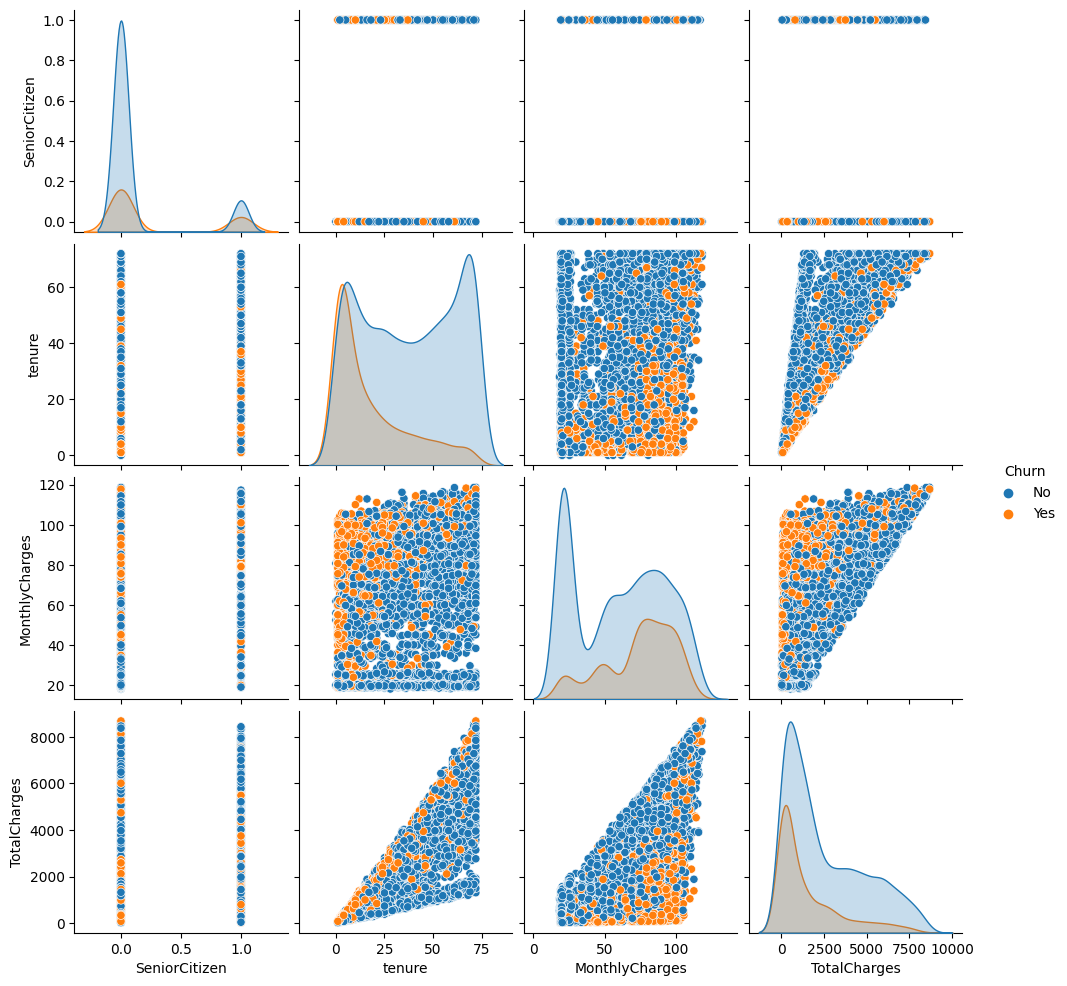

In [45]:
#sns.jointplot(data=train, x='SeniorCitizen', y='Churn')
#train['TotalCharges'] = train['TotalCharges'].astype(float)

#train['TotalCharges'].str.strip()
train['TotalCharges'] = train['TotalCharges'].replace('', np.nan) #.astype(float)
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

sns.pairplot(data=train, hue='Churn')

In [52]:
sns.boxplot(data=train, y=train, hue='Churn')
sns.boxplot(data=train ,y=['MonthlyCharges', 'tenure', 'TotalCharges'], x='Churn')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Clean data

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   object 


In [58]:
# Group categorical and numerical cols
num_cols = train.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
cat_cols = train.drop(['tenure', 'MonthlyCharges', 'TotalCharges','Churn'], axis=1)
y_train = train['Churn']

# One hot encode cat_cols 


In [66]:
# create an encoder and fit the dataframe
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
le.fit_transform(train['gender'])  # this wasn't finished 
# using OHE 
ohe = OneHotEncoder(sparse=False).fit(cat_cols)
encoded = ohe.transform(cat_cols)
# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=ohe.get_feature_names_out()
)
encoded_df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [74]:
# scale continuous variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(num_cols) 
scaled = scaler.transform(num_cols)
encoded_df = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())

# concat encoded and scaled data 
X_train = pd.concat([encoded_df, scaled_df], axis=1)


In [85]:
scaled_df = scaled_df.dropna()
scaled_df.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [138]:
y_train = train['Churn'].map({'Yes':1,'No':0})
y_train

0       0
1       0
2       0
3       0
4       0
       ..
5277    0
5278    1
5279    0
5280    1
5281    1
Name: Churn, Length: 5272, dtype: int64

In [203]:
def clean_data(data):
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data = data.dropna() 
    return data 

def transform_data(train, val):

    train_num_cols = train.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
    train_cat_cols = train.drop(['tenure', 'MonthlyCharges', 'TotalCharges','Churn'], axis=1)
    y_train = train['Churn'].map({'Yes':1,'No':0})

    # OHE categorical
    ohe = OneHotEncoder(sparse=False).fit(train_cat_cols)
    encoded_train = ohe.transform(train_cat_cols)
    encoded_df_train = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out())
    # Scale numerical 
    scaler = MinMaxScaler().fit(train_num_cols) 
    scaled_train = scaler.transform(train_num_cols)
    scaled_df_train = pd.DataFrame(scaled_train, columns=scaler.get_feature_names_out())

    X_train = pd.concat([encoded_df_train, scaled_df_train], axis=1)

    val_num_cols = val.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
    val_cat_cols = val.drop(['tenure', 'MonthlyCharges', 'TotalCharges','Churn'], axis=1)
    y_val = val['Churn'].map({'Yes':1,'No':0})

    encoded_val = ohe.transform(val_cat_cols)
    encoded_df_val = pd.DataFrame(encoded_val, columns=ohe.get_feature_names_out())

    scaled_val = scaler.transform(val_num_cols)
    scaled_df_val = pd.DataFrame(scaled_val, columns=scaler.get_feature_names_out())

    X_val = pd.concat([encoded_df_val, scaled_df_val], axis=1)
        
    return X_train, y_train, X_val, y_val 
    


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

train = clean_data(train)
val = clean_data(val)
X_train, y_train, X_val, y_val  = transform_data(train, val)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_val)
#print(classification_report(preds, y_val))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_val)
#print(classification_report(preds, y_val))

#xgb = XGBClassifier()
xgb = XGBClassifier(learning_rate=0.01,
                    max_depth=7,
                    reg_lambda=2)
xgb.fit(X_train, y_train)
preds_train = xgb.predict(X_train)
preds_val = xgb.predict(X_val)
print(classification_report(preds_train, y_train))
print(classification_report(preds_val, y_val))


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4049
           1       0.63      0.74      0.68      1223

    accuracy                           0.84      5272
   macro avg       0.78      0.81      0.79      5272
weighted avg       0.85      0.84      0.85      5272

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       611
           1       0.58      0.64      0.61       150

    accuracy                           0.84       761
   macro avg       0.75      0.76      0.75       761
weighted avg       0.84      0.84      0.84       761



In [146]:

import statsmodels.api as sm
#y_train = list(y_train)
#log_reg = sm.Logit(y_train, X_train).fit()
#print(log_reg.summary())


In [161]:
pd.DataFrame(lr.coef_, columns=X_train.columns).T.sort_values(by=0, ascending=False)

,0
TotalCharges,1.378068
Contract_Month-to-month,0.624239
InternetService_Fiber optic,0.428177
OnlineSecurity_No,0.265702
PaymentMethod_Electronic check,0.253707
TechSupport_No,0.222226
MonthlyCharges,0.203789
StreamingMovies_Yes,0.165754
PaperlessBilling_Yes,0.154464
StreamingTV_Yes,0.152384


In [204]:
# Write files to pickle (binary) so can open with streamlit 
import pickle

with open("./models/churn_pred_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

with open("./models/churn_pred_label_encoder.pkl", "wb") as file:
    pickle.dump(transform_data, file)


In [205]:
def preprocess_data(data):
    try:
        data = data.drop("customerID", axis=1)
    except:
        pass
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data = data.dropna() 
    return data 

def load_pickles(model_pickle_path, transformer_pickle_path):
    with open(model_pickle_path, "rb") as file:
        model = pickle.load(file)
    with open(transformer_pickle_path, "rb") as file:
        transform_data = pickle.load(file)
    return model, transform_data


def make_predictions(train, test):
    model_pickle_path = "./models/churn_pred_model.pkl"
    transformer_pickle_path = "./models/churn_pred_label_encoder.pkl"
    model, transform_data = load_pickles(model_pickle_path, transformer_pickle_path)

    train = preprocess_data(train)
    test = preprocess_data(test)
    
    X_train, X_test, y_train, y_test = transform_data(train, test)
    prediction = model.predict(y_train)
    
    return prediction 


# get training data
train = pd.read_csv("./data/training_data.csv")
# drop customer ID: not a feature for training 
train.drop("customerID", axis=1, inplace=True)

test = pd.read_csv('./data/single_row_to_check.csv', index_col=0)

pred = make_predictions(train, test)

print(pred[0])

0


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [206]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65,No
1,Male,0,Yes,No,66,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,63.85,4264.60,No
2,Male,0,Yes,Yes,42,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,73.15,3088.25,No
3,Male,0,No,No,19,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,69.60,1394.55,No
4,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.20,1192.30,No
